# <h7>Author - Vaibhavi Deepak Gawas</h7><br>
# GRIP September 2021 - Sparks Foundation
# Technical Task 1- Prediction Using Supervised ML(Linear Regression)




In this task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

Steps Performed are:<br>
1)Loading the Dataset<br>
2)Analyzing the data<br>
3)Visualizing the data<br>
4)Preparing The Data<br>
5)Model building and training<br> 
6)Prediction and Evaluation<br>


## 1. Loading Data:
   This Dataset is downloaded from https://bit.ly/2HxiGGJ .This Dataset has 25 samples  with 2 Features. 

In [ ]:
# importing required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#Loading Data from Dataset
score_data = pd.read_csv('student_scores.csv')
score_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## 2. Analyzing the Data<br>
 in this step we will use dataframe methode to take overview of data

In [ ]:
# Shape of data
score_data.shape

(25, 2)

In [ ]:
#List of features
score_data.columns

Index(['Hours', 'Scores'], dtype='object')

In [ ]:
#information about dataset
score_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
# Description of dataset
score_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
#Finding out missing Values
score_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

There are no null values in our dataset

In [ ]:
#Finding corelation between the data
score_data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## 3. Visualizing the Data

In this step we can visualize the data to understand how data is distributed and how features are related to each other

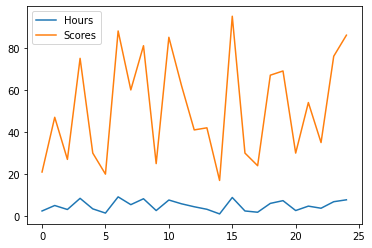

In [ ]:
#visualizng simple line graph
score_data.plot()

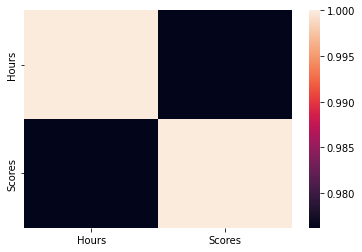

In [ ]:
sns.heatmap(score_data.corr())

Text(0.5, 1.0, 'Hours vs Scores')

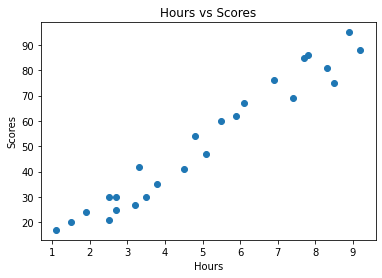

In [ ]:
#scatter plot
plt.scatter(score_data['Hours'],score_data['Scores'])
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Hours vs Scores")

## 4. Spliting the Data

in this we will split our data for training and testing

In [ ]:
#spliting input and output
X = score_data[['Hours']]
y = score_data.drop('Hours',axis =1)

In [ ]:
#spliting dataset into taining and testing (dividing ratio: 80:20)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [ ]:
X_train.shape,X_test.shape

((20, 1), (5, 1))

## 5. Model Building and Training

Supervised Machine Learning is most commanly used regression method where we give some values as input to model and predict output the main goal of this regression algorithm is to plot best fit-line or curve between the data.<br>
Here we are using **Linear Reression Model** to train our Dataset

In [ ]:
#importing linear regression model
from sklearn.linear_model import LinearRegression

#instantiate the model
model  = LinearRegression()

#fit the model
model.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## 6. Prediction and Evaluation 

In [ ]:
#prediction using model
y_train_prediction = model.predict(X_train)
y_test_prediction = model.predict(X_test)

In [ ]:
# Calculating accuracy of model
acc_train = model.score(X_train,y_train)
acc_test = model.score(X_test,y_test) 

In [ ]:
from sklearn.metrics import mean_squared_error

#Calculating Root mean squared error(RMSE) 
rms_train = np.sqrt(mean_squared_error(y_train,y_train_prediction))
rms_test = np.sqrt(mean_squared_error(y_test,y_test_prediction))

In [ ]:
print("Linear Regression Model : ")
print("\nAccuracy of Training Dataset : ",acc_train)
print("Accuracy of testing dataset : ",acc_test)
print("\nRMSE of training dataset : ",rms_train)
print("RMSE of testing dataset : ",rms_test)

Linear Regression Model : 

Accuracy of Training Dataset :  0.9515510725211553
Accuracy of testing dataset :  0.9454906892105354

RMSE of training dataset :  5.558613350226344
RMSE of testing dataset :  4.647447612100373


In [ ]:
#checking actual and predicted value
predicted = y_test_prediction[:,0]
actual = np.array(y_test['Scores'])
df_dict = {"Actual":actual,"Predicted":predicted}
df = pd.DataFrame(df_dict)
df.head()


,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Text(0.5, 1.0, 'Training Data (Hours vs Score)')

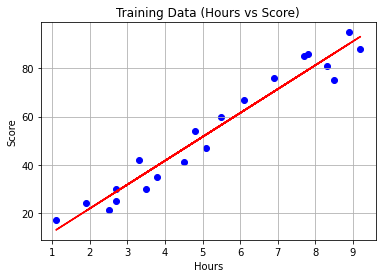

In [ ]:
# plotting our results (For Taining Data)
plt.scatter(X_train,y_train,color= "blue")
plt.plot(X_train,y_train_prediction,color="red")
plt.grid(True)
plt.xlabel("Hours")
plt.ylabel("Score")
plt.title("Training Data (Hours vs Score)")


Text(0.5, 1.0, 'Training Data (Hours vs Score)')

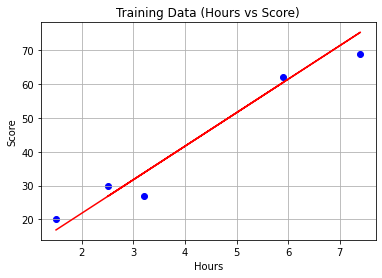

In [ ]:
# plotting our results (For Testing Dataset)
plt.scatter(X_test,y_test,color= "blue")
plt.plot(X_test,y_test_prediction,color="red")
plt.grid(True)
plt.xlabel("Hours")
plt.ylabel("Score")
plt.title("Training Data (Hours vs Score)")

In [ ]:
# using our model for predictions
# 1. prdiction of score of student if he studies for 9.25 hrs/day

output = model.predict([[9.25]])
print(f"The Score of student is {output[0][0]} if he studies for 9.25 hrs/day")

The Score of student is 93.69173248737539 if he studies for 9.25 hrs/day


## Conclusion : 

From this task I understood how we can use linear regression model to predict the output by giving set of some features as a input.Accuracy of this model comes as 94.55% and predicted output for score of student is 93.69% if he studies for 9.25 hrs/day.